### LSE Data Analytics Online Career Accelerator 

### Turtle Games Data Analysis Project

### Scenario

You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 

- how customers accumulate loyalty points 
- exploring the structure using decision trees
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns 


# 1. Data Cleaning & Linear regression using Python

The marketing department of Turtle Games prefers Python for data analysis, so it reached out to me to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, I will investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. 

Note that I will use this data set in the future for further analysis, therefore, it is strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.


## 1. Load and explore the data

In [3]:
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd
import pylab as py
import sklearn

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Import the statsmodels.
import statsmodels.api as sm 
from statsmodels.formula.api import ols



In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Any missing values?
reviews.isnull().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [9]:
# Explore the data.
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [11]:
# Basic descriptive statistics.
reviews.describe()


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [15]:
# Drop unnecessary columns.
# Remove redundant columns (language and platform).
new_reviews = reviews[['gender','age','remuneration (k£)','spending_score (1-100)','loyalty_points','education','product','review','summary']]

# View column names.
new_reviews.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [25]:
# Rename the column headers.
# Change column headings to names that are easier to reference (e.g. renumeration and spending_score).
new_reviews = new_reviews.rename(columns={
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score'
})
# View column names.
new_reviews.head()


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [27]:
# Create a CSV file as output.
new_reviews.to_csv('new_reviews.csv')


In [35]:
# Import new CSV file with Pandas.
# Load the CSV file(s) as reviews.
nr = pd.read_csv('new_reviews.csv')

# View the DataFrame.
nr.head()


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

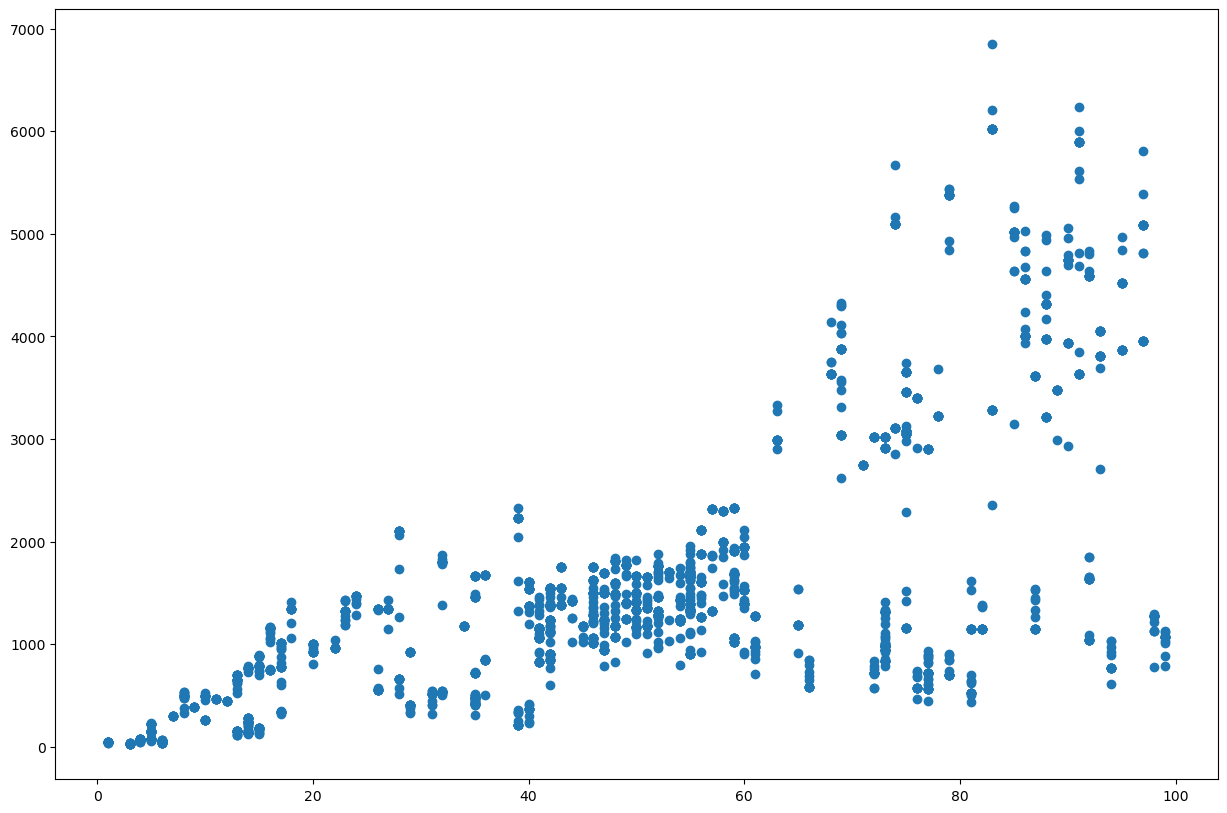

In [37]:
# Define independent variable.
y = nr['loyalty_points'].values.reshape(-1, 1) 

# Define dependent variable.
X = nr[['spending_score']].values.reshape(-1, 1) 

# Check for linearity.
plt.scatter(X,y)


In [39]:
# Create model and print summary of metrics.

from sklearn import linear_model

# Fit the regression model.
lm1 = linear_model.LinearRegression()
lm1.fit(X, y) 


LinearRegression()

In [41]:
# Pass linear regression through OLS methods.
lm1_ols = ols('loyalty_points ~ spending_score', data = nr).fit()

# Print summary
lm1_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          2.92e-263
Time:                        17:06:32   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -75.0527     45.931     -1.634      0.102    -165.129      15.024
spending_score    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Set the X coefficient and the constant to generate the regression table.
# Print the R-squared value.
print("R-squared: ", lm1.score(X,y))  # Correlation of the coefficient

# Print the intercept.
print("Intercept: ", lm1.intercept_) 

# Print the coefficients.
print("Coefficients:",lm1.coef_)  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, lm1.coef_))  


R-squared:  0.4520008865838909
Intercept:  [-75.05266293]
Coefficients: [[33.06169326]]


[(array([39], dtype=int64), array([33.06169326]))]

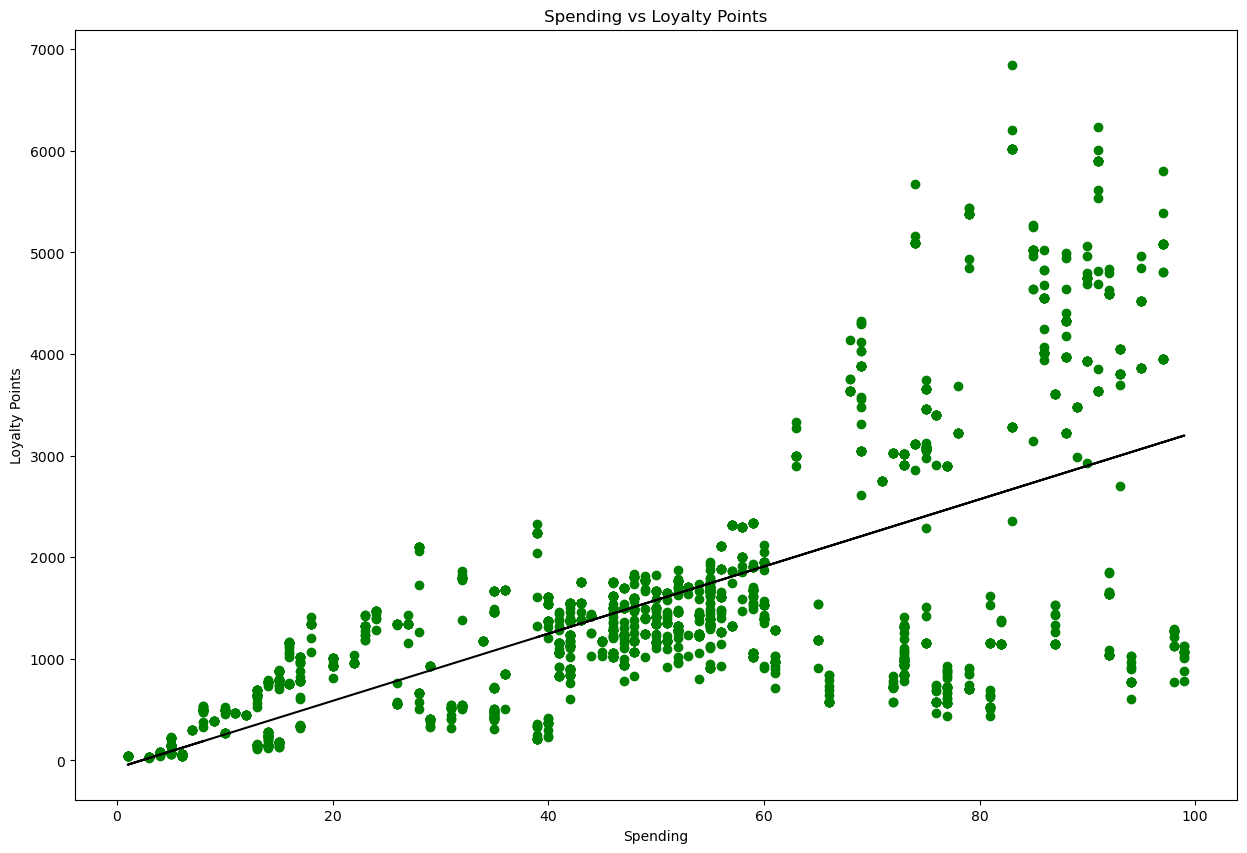

In [45]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot the graph with a regression line.
plt.scatter(X, y, color='green')

# Plot the best fit line
plt.plot(X, lm1.predict(X), color='black')

# Add titles and label
plt.title('Spending vs Loyalty Points')
plt.xlabel('Spending')
plt.ylabel('Loyalty Points')

# Display plot
plt.show()

**Interpretation:**

**Adjusted R-squared (0.452):**

This suggests that 45.2% of the variance in the dependent variable (loyalty_points) is explained by the independent variable (spending_score). While it's a significant portion, it indicates that more than half of the variability is due to factors not included in the model. There may be other important predictors affecting loyalty_points.

**P-value (P>|t|) for spending_score = 0.000:**

Since the p-value for spending_score is < 0.05, this predictor is statistically significant, meaning there is strong evidence that spending_score is related to loyalty_points.

**Conclusion:**

The model suggests that spending_score has a strong positive and significant effect on loyalty_points, but the model only explains about 45.2% of the variation in loyalty_points. Other factors or variables should be examined together to build up a better prediction model.


### 5b) remuneration vs loyalty

In [47]:
# Define dependent variable.
X1 = nr[['remuneration']]

# Create model and print summary of metrics.
# Fit the regression model.
lm2 = linear_model.LinearRegression()
lm2.fit(X1, y) 

LinearRegression()

In [49]:
# Pass linear regression through OLS methods.
lm2_ols = ols('loyalty_points ~ remuneration', data = nr).fit()

# Print summary
lm2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          2.43e-209
Time:                        17:07:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -65.6865     52.171     -1.259      0.208    -168.001      36.628
remuneration    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.
print("Predicted values: ", lm2_ols.predict())  

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [53]:
# Set the the X coefficient and the constant to generate the regression table.
# Print the R-squared value.
print("R-squared: ", lm2.score(X1,y))  # Correlation of the coefficient

# Print the intercept.
print("Intercept: ", lm2.intercept_) 

# Print the coefficients.
print("Coefficients:",lm2.coef_)  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X1, lm2.coef_))  

# View the output.


R-squared:  0.3795357732793636
Intercept:  [-65.6865128]
Coefficients: [[34.18782549]]


[('remuneration', array([34.18782549]))]

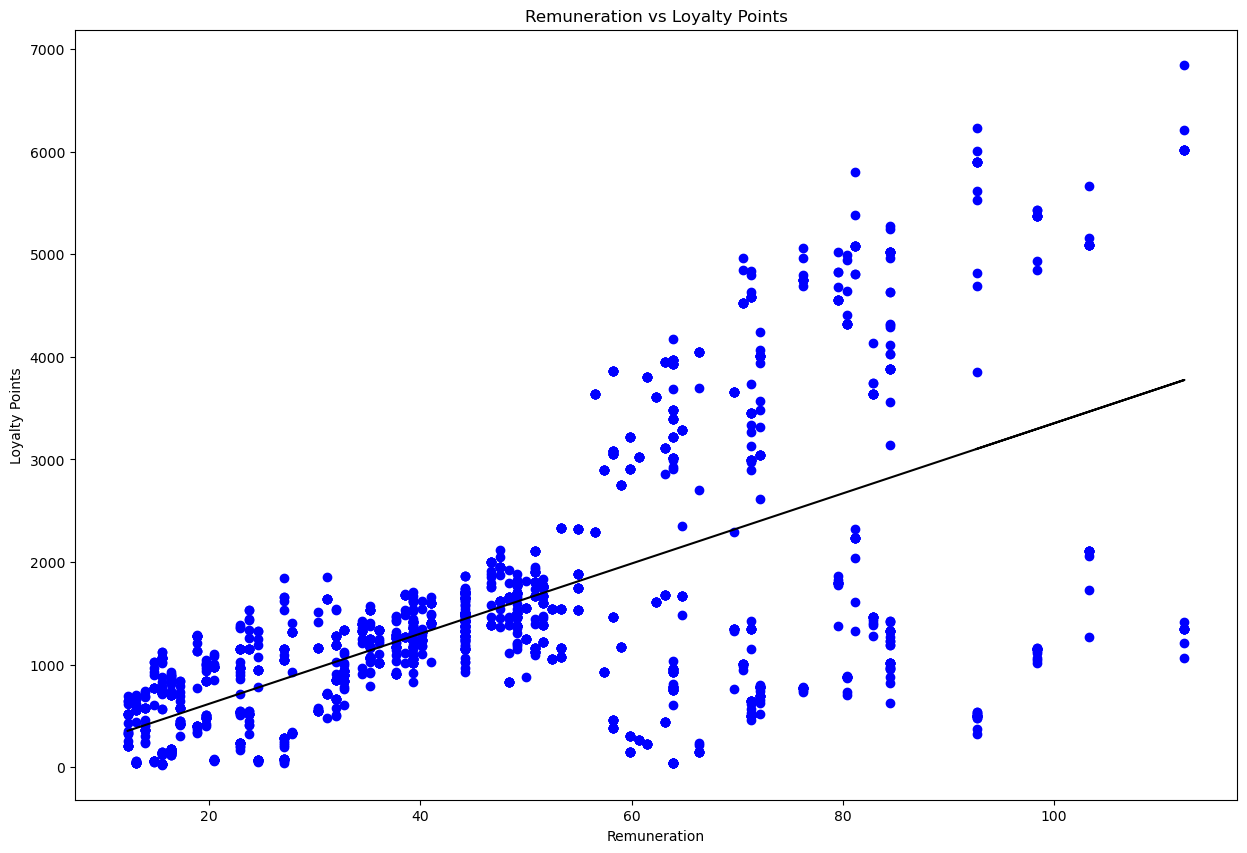

In [55]:
# Plot graph with regression line.
plt.scatter(X1, y, color='blue')

# Plot the best fit line
plt.plot(X1, lm2_ols.predict(X1), color='black')

# Add titles and label
plt.title('Remuneration vs Loyalty Points')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# Display plot
plt.show()

**Interpretation:**

**Adjusted R-squared (0.380):**

This suggests that 38.0% of the variance in the dependent variable (remuneration) is explained by the independent variable (spending_score). While it's not a small portion, it indicates that more than half of the variability is due to factors not included in the model. There may be other important factors affecting loyalty_points.

**P-value (P>|t|) for spending_score = 0.000:**

Since the p-value for spending_score is < 0.05, this predictor is statistically significant, meaning there is strong evidence that spending_score is related to remuneration.

**Conclusion:**

The model suggests that remuneration has a strong positive and significant effect on loyalty_points, but the model only explains about 38.0% of the variation in loyalty_points. Other factors or variables should be examined together to build up a better prediction model.


### 5c) age vs loyalty

In [57]:
# Define dependent variable.
X2 = nr[['age']]

# Create model and print summary of metrics.
# Fit the regression model.
lm3 = linear_model.LinearRegression()
lm3.fit(X2, y)

LinearRegression()

In [59]:
# Pass linear regression through OLS methods.
lm3_ols = ols('loyalty_points ~ age', data = nr).fit()

# Print summary
lm3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 28 Sep 2024   Prob (F-statistic):             0.0577
Time:                        17:08:54   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.
print("Predicted values: ", lm3_ols.predict())  

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [61]:
# Set the X coefficient and the constant to generate the regression table.
# Print the R-squared value.
print("R-squared: ", lm3.score(X2,y))  # Correlation of the coefficient

# Print the intercept.
print("Intercept: ", lm3.intercept_) 

# Print the coefficients.
print("Coefficients:",lm3.coef_)  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X2, lm3.coef_))  

# View the output.


R-squared:  0.0018015480437203468
Intercept:  [1736.5177394]
Coefficients: [[-4.01280515]]


[('age', array([-4.01280515]))]

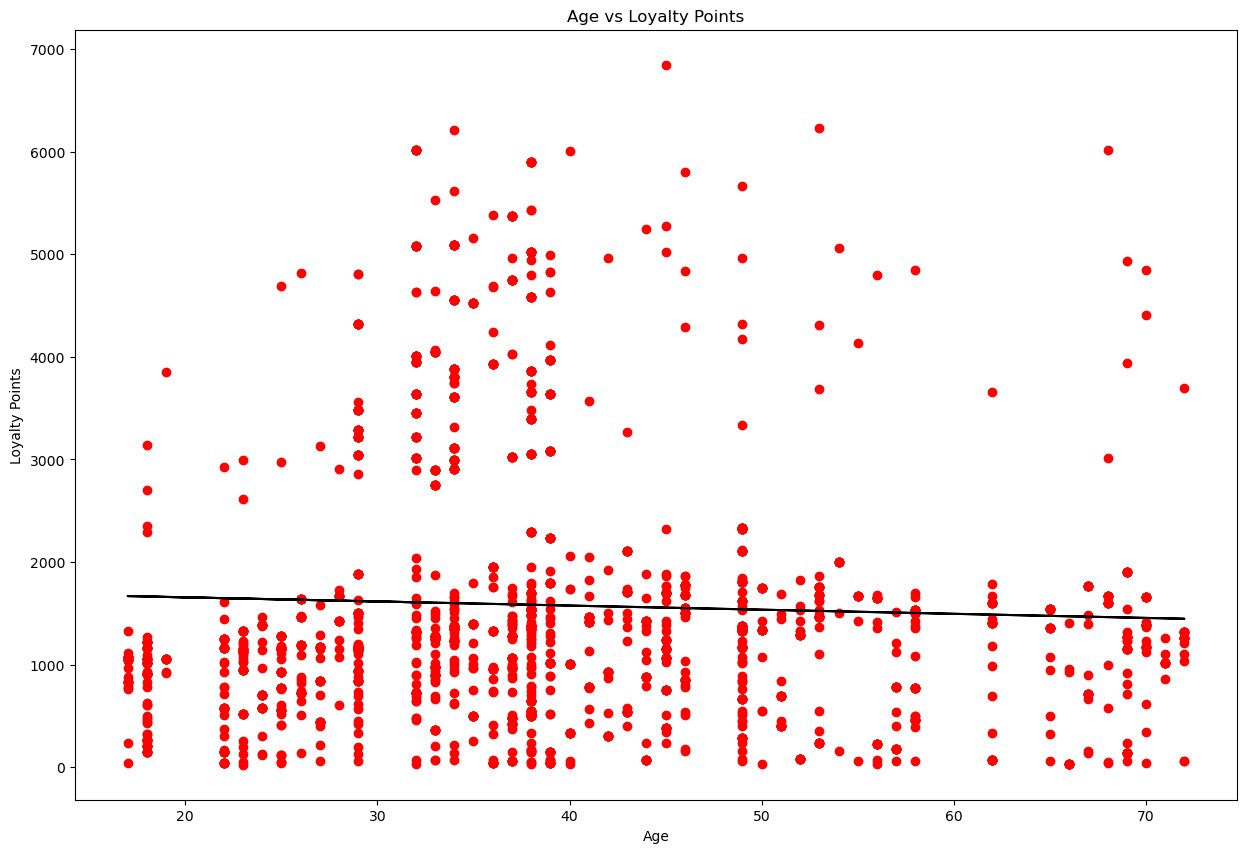

In [63]:
# Plot graph with regression line.
plt.scatter(X2, y, color='red')

# Plot the best fit line
plt.plot(X2, lm3_ols.predict(X2), color='black')

# Add titles and label
plt.title('Age vs Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# Display plot
plt.show()

**Interpretation:**

**Adjusted R-squared (0.001):**

The adjusted R-squared of 0.001 indicates that the model explains only 0.1% of the variance in the dependent variable (loyalty_points). This is extremely low, suggesting that the variable age is not a significant predictor of loyalty_points in this model. Essentially, the model provides little to no explanatory power.

**Coefficient (age = -4.0128):**

This suggests a relatively weak negative correlation. However, the coefficient alone isn't sufficient to conclude the relationship is meaningful yet.

**P-value for age (0.058):**

The p-value of 0.058 indicates that the relationship between age and loyalty_points is not statistically significant at 5% level (p > 0.05). Because the p-value is slightly higher than 0.05, we do not have strong enough evidence to assumes the relationship between age and loyalty_points.

## 6. Observations and insights

***Observation***

From the three linear regressions between loyalty_point and spending_score, remuneration, and age respectively, we can draw an initial conclusion that loyalty_point has some relationships with spending_score and remuneration level of the customers. But either of them is the decisive factor to the loyalty_point, and this necessites further analysis in finding out what factors are the most decisive ones.


# 

# Exploring the structure using decision trees.

Turtle Games team wants to use decision trees to attempt to better understand the structure found in the data. I will grow and prune a decision tree regressor and then visualise and interpret the output. I will comment on the potential usefulness in decision-making processes and your observations regarding the model.


## 1. Load and prepare the data

In [1]:
# Import all the necessary packages
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# Settings for the notebook.
plt.rcParams['figure.figsize'] = [15, 10]


In [5]:
# Create your new DataFrame.
df2 = pd.read_csv('new_reviews.csv')

# View data
print(df2.info())
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [7]:
# Specify y.
y_tree = df2['loyalty_points']

# Specify X.
X_tree = df2.drop(['loyalty_points','gender','education','review','summary'], axis=1)


In [9]:
# Review X and Y.
print(X_tree.head())
y_tree


   Unnamed: 0  age  remuneration  spending_score  product
0           0   18         12.30              39      453
1           1   23         12.30              81      466
2           2   22         13.12               6      254
3           3   25         13.12              77      263
4           4   33         13.94              40      291


0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

## 2. Create train and test data sets.

In [11]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree,
                                                   test_size=0.3,
                                                   random_state=42)

## 3. Create Decision tree regressor

In [13]:
# Import library
from sklearn.tree import DecisionTreeRegressor

# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

# Check
regressor


DecisionTreeRegressor(random_state=42)

In [15]:
# Evaluate the model.
regressor.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

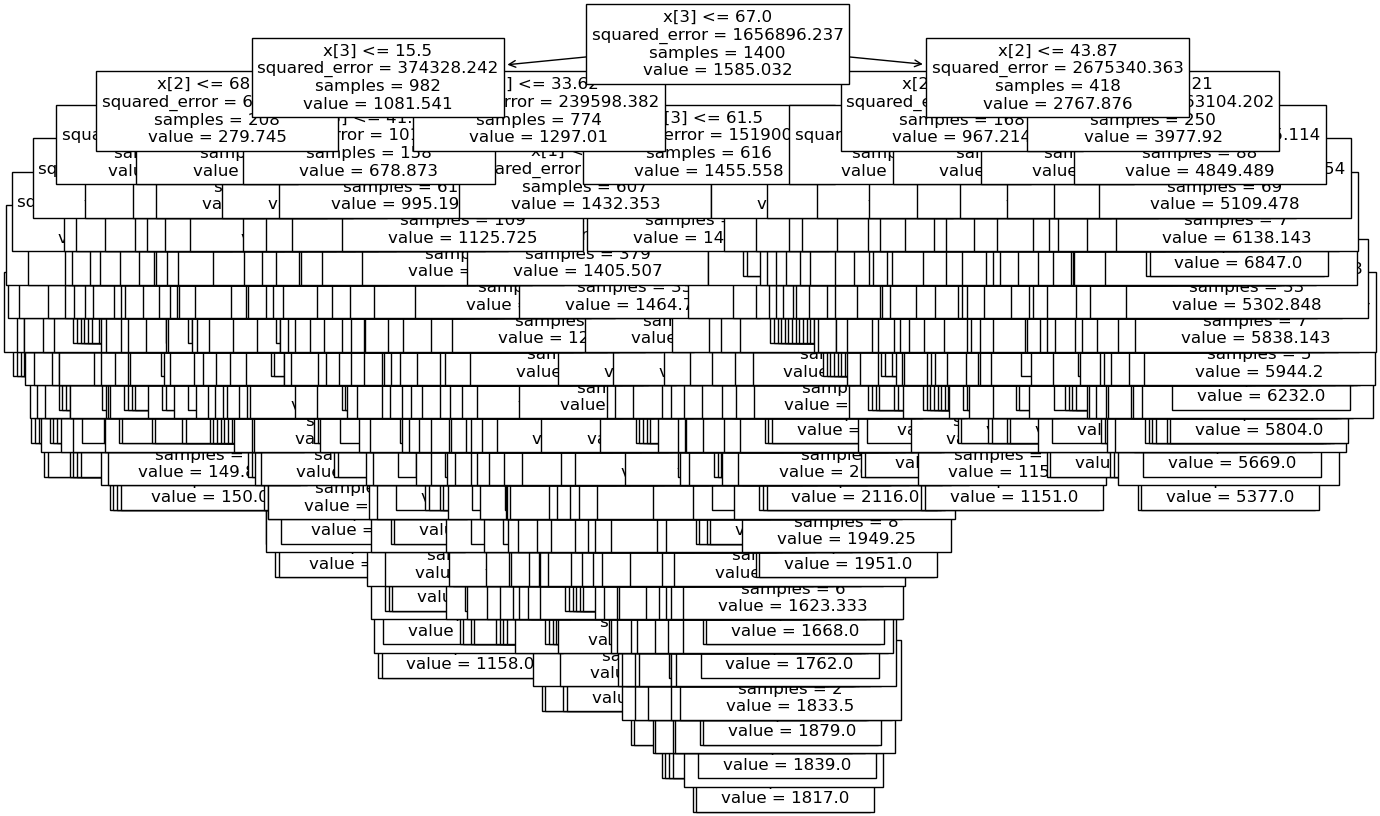

In [17]:
import matplotlib.pyplot as plt 
from sklearn import tree

tree.plot_tree(regressor.fit(X_train,y_train), fontsize=12)

# Print the plot with plt.show().
plt.show()  


In [19]:
# Prune the model.

regressor_p = DecisionTreeRegressor(max_depth = 3,
                                 min_samples_leaf = 3,
                                 min_samples_split = 3,
                                  random_state=42)

regressor_p.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=3,
                      random_state=42)

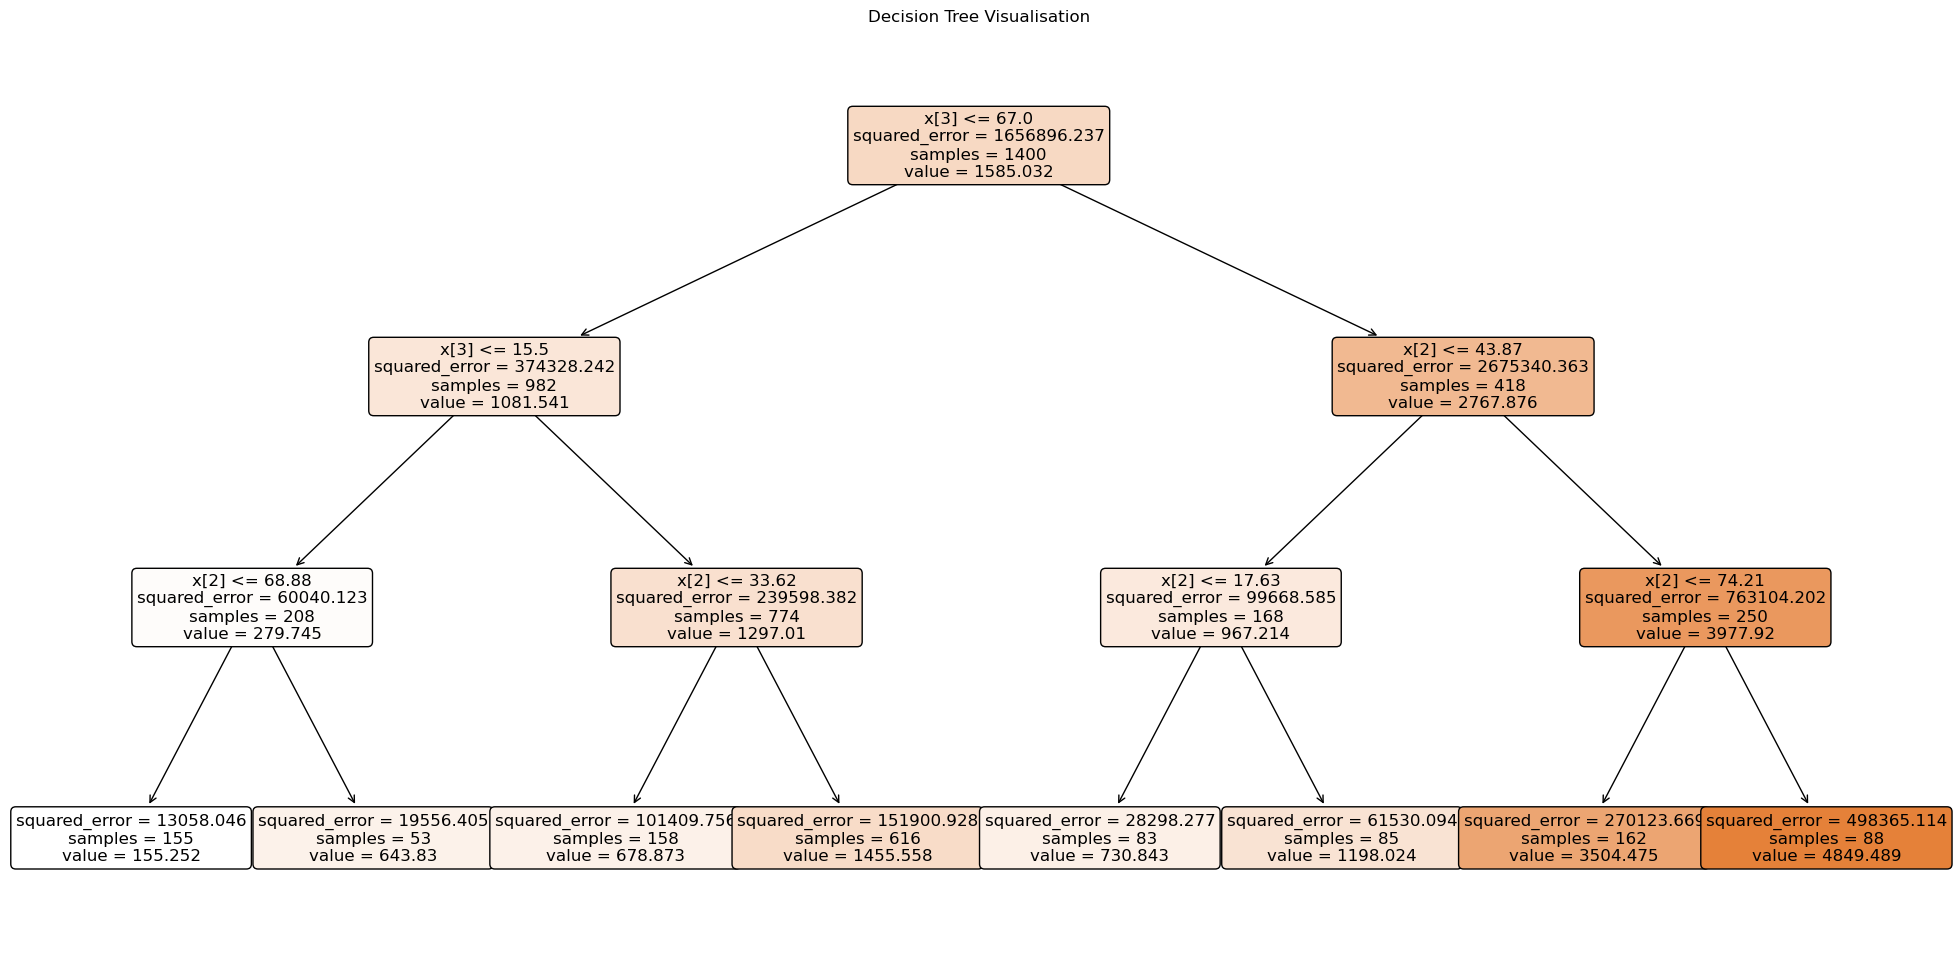

In [27]:
# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(25, 12))
tree.plot_tree(regressor_p, ax=ax, fontsize=12, rounded = True, filled = True)
plt.title("Decision Tree Visualisation")

# Print the plot with plt.show().
plt.show() 


## 4. Fit and plot final model.

In [29]:
# Fit and plot final model.
regressor_p.fit(X_test,y_test)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=3,
                      random_state=42)

In [33]:
# Test the good fit of model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = regressor_p.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print MSE and R^2
print("Mean Squared Error:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


Mean Squared Error: 194232.34775220914
RMSE: 440.71799118280745
R-squared: 0.8800884591909459


## 5. Discuss: Insights and observations


***Interpret model and note observations.***
**Observations:**

**Goodness-of-Fit:**
**Mean Squared Error (MSE): 194,232.35** — This indicates a moderate error in predicting loyalty points

**Root Mean Squared Error (RMSE): 440.72** — This is the square root of the MSE, providing an interpretation of prediction error in the same units as the dependent variable (loyalty_points). It helps visualize the error on the same scale as the loyalty points themselves.

**R-squared (R²): 0.88** — 88% of the variation in the dependent variable (loyalty points) is explained by this decision tree model, which suggests a good fit. 

**Overall:**

1. The model has a good fit, explaining 88% (R-squared = 0.88) of the variability in the data.
2. The remuneration (x[2]) and spending_score (x[3]) appear to be the most influential factors in predicting loyalty points.
3. Although the RMSE of 440 indicates the model's predictions are not perfect, it’s likely performing well, given the high R-squared.


# 

# Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. Thus I am tasked to identify groups within the customer base that can be used to target specific market segments. I will use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.


## 1. Load and explore the data

In [229]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')


In [231]:
# Load the CSV file(s) as df3.
df3 = pd.read_csv('new_reviews.csv')

# View DataFrame.
print(df3.info())
df3.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [235]:
# Drop unnecessary columns.
df3 = df3[['remuneration','spending_score']]

# View DataFrame.
df3.head()


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [239]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [241]:
# Descriptive statistics.
df3.describe()


,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


In [243]:
# Print the correlation table
df3.corr()


,remuneration,spending_score
remuneration,1.000000,0.005612
spending_score,0.005612,1.000000


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

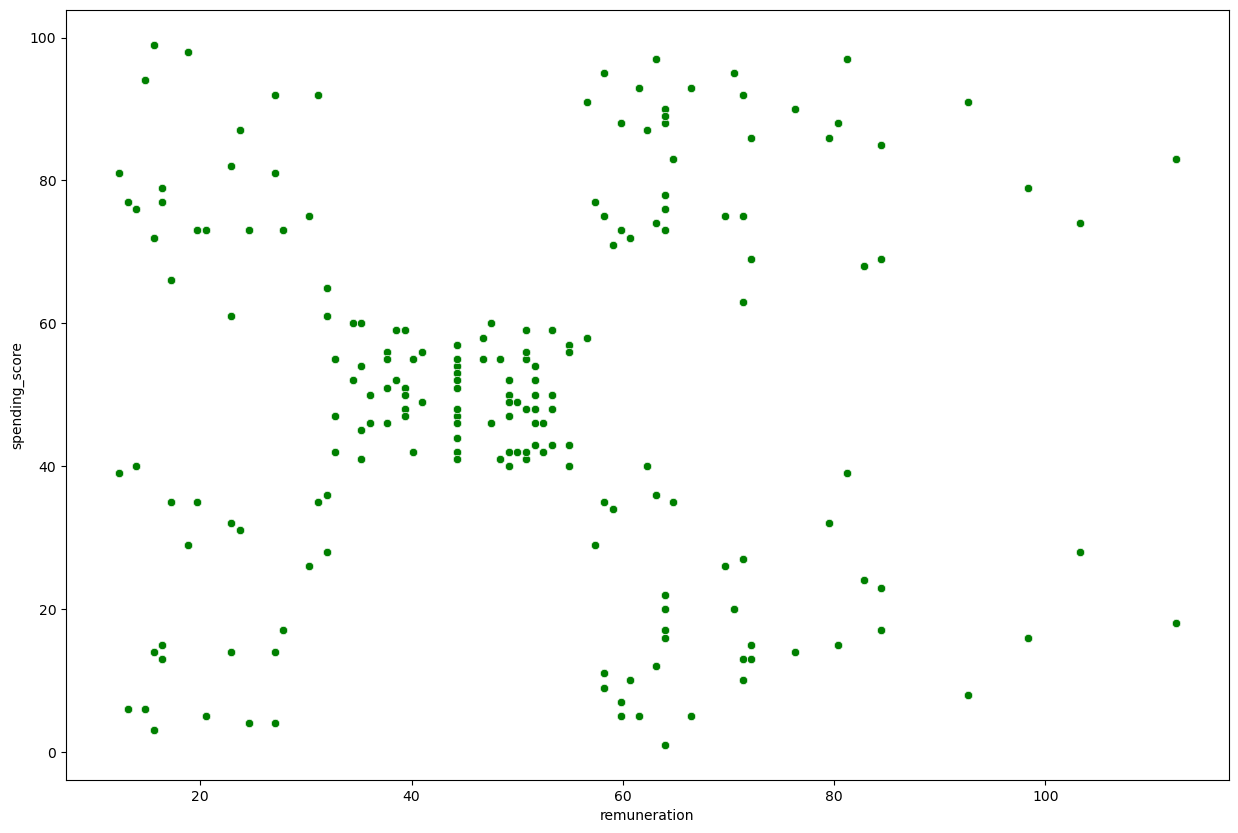

In [249]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',y='spending_score',data=df3, color='green')


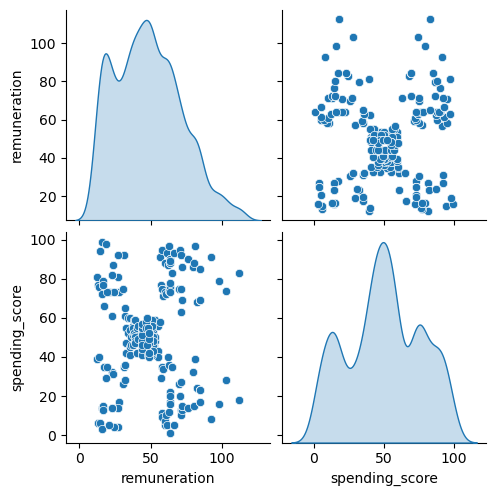

In [251]:
# Create a pairplot with Seaborn.
sns.pairplot(df3,
             vars=df3,
             diag_kind='kde')


## 3. Elbow and silhoutte methods

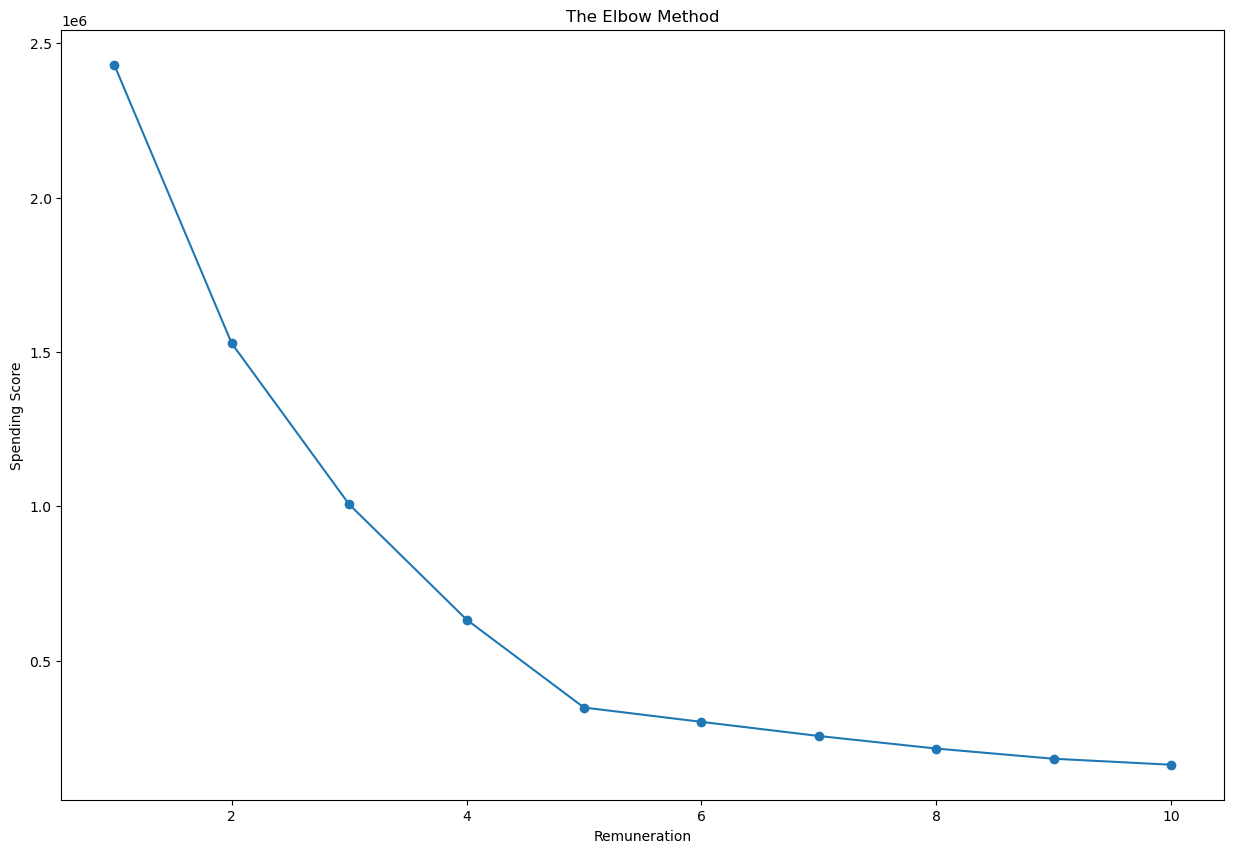

In [255]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans

# Elbow chart for us to decide on the number of optimal clsuter.
ss = [] ## SS = sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(df3)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1,11),
        ss,
        marker='o')

# Insert labels and titles
plt.title("The Elbow Method")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

plt.show()


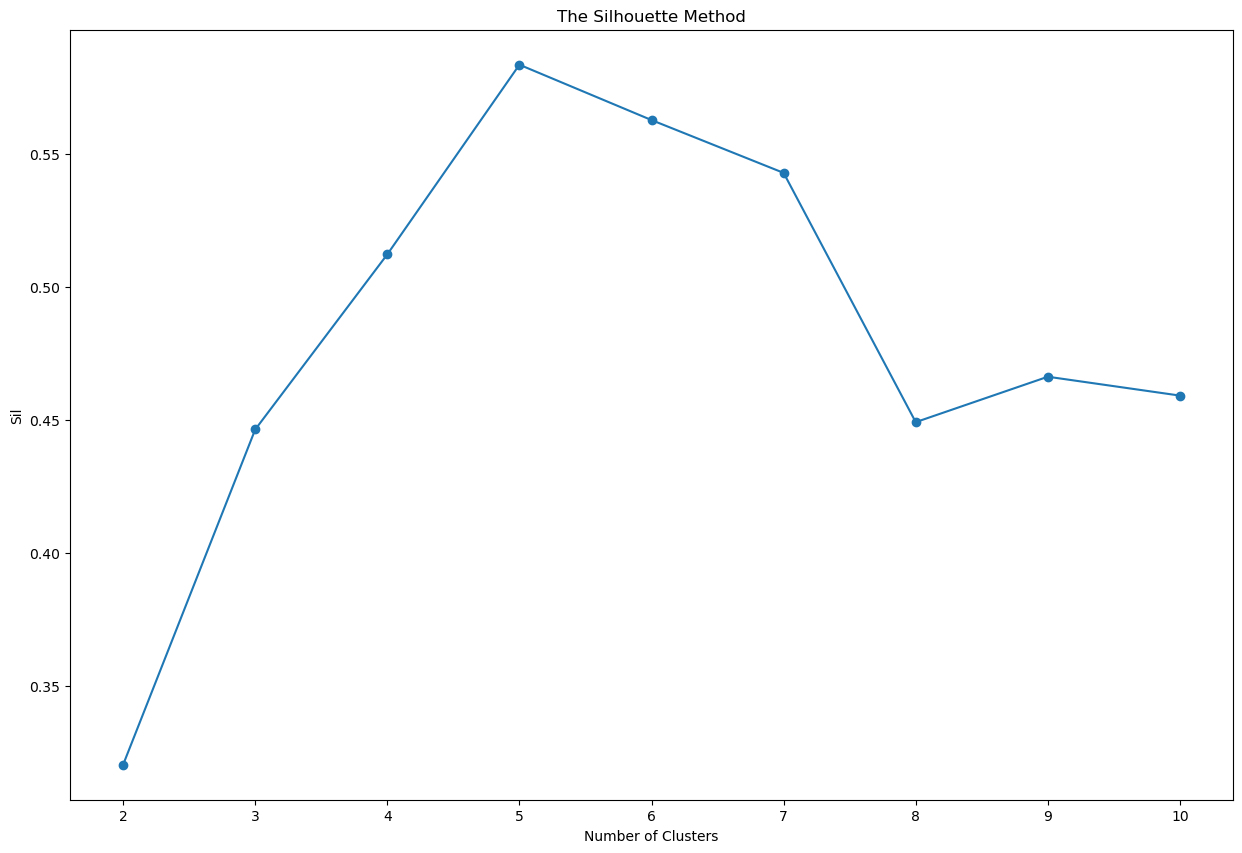

In [263]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df3)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df3,
                               labels,
                               metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2,kmax+1),
        sil,
        marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sil")

plt.show()


**Observation:**

Both methods refered to 5 clusters. But let's try 4 & 5 and see how different it would make.

## 4. Evaluate k-means model at different values of *k*

In [ ]:
## Set K = 4 (4 clusters)

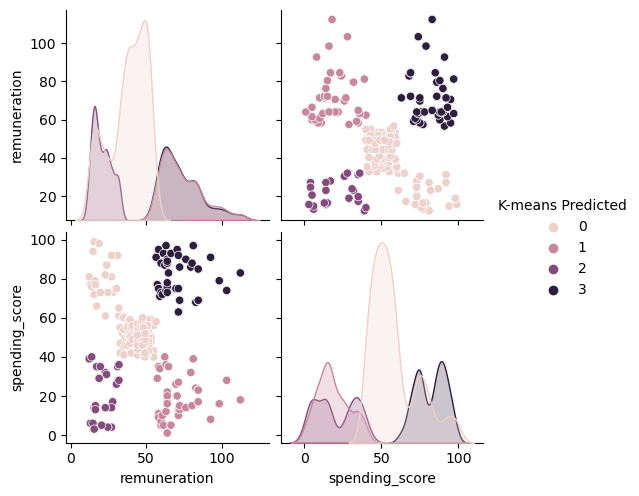

In [271]:
# Use four clusters.
kmeans4 = KMeans(n_clusters = 4,
               max_iter = 15000,
               init='k-means++',
               random_state=0).fit(df3)

clusters4 = kmeans4.labels_

df3['K-means Predicted'] = clusters4

# Plot the predicted
sns.pairplot(df3,
            hue='K-means Predicted',
            diag_kind='kde')


In [273]:
# Check the number of observations per predicted class.
df3['K-means Predicted'].value_counts()


K-means Predicted
0    1013
3     356
1     351
2     280
Name: count, dtype: int64

## Set K = 5 (5 clusters)

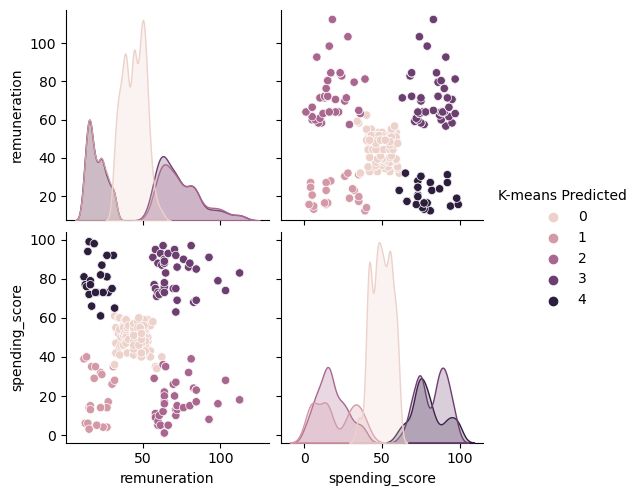

In [275]:
# Use five clusters.
kmeans5 = KMeans(n_clusters = 5,
               max_iter = 15000,
               init='k-means++',
               random_state=0).fit(df3)

clusters5 = kmeans5.labels_

df3['K-means Predicted'] = clusters5

# Plot the predicted
sns.pairplot(df3,
            hue='K-means Predicted',
            diag_kind='kde')


In [277]:
# Check the number of observations per predicted class.
df3['K-means Predicted'].value_counts()


K-means Predicted
0    774
3    356
2    330
1    271
4    269
Name: count, dtype: int64

## 5. Fit final model and justify your choice

In [279]:
# Apply the final model.
kmeans5 = KMeans(n_clusters = 5,
               max_iter = 15000,
               init='k-means++',
               random_state=0).fit(df3)

clusters5 = kmeans5.labels_

df3['K-means Predicted'] = clusters5


In [281]:
# Check the number of observations per predicted class.
df3['K-means Predicted'].value_counts()


K-means Predicted
0    774
3    356
2    330
1    271
4    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [283]:
# View the DataFrame.
df3.head()


,remuneration,spending_score,K-means Predicted
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1


<Axes: xlabel='remuneration', ylabel='spending_score'>

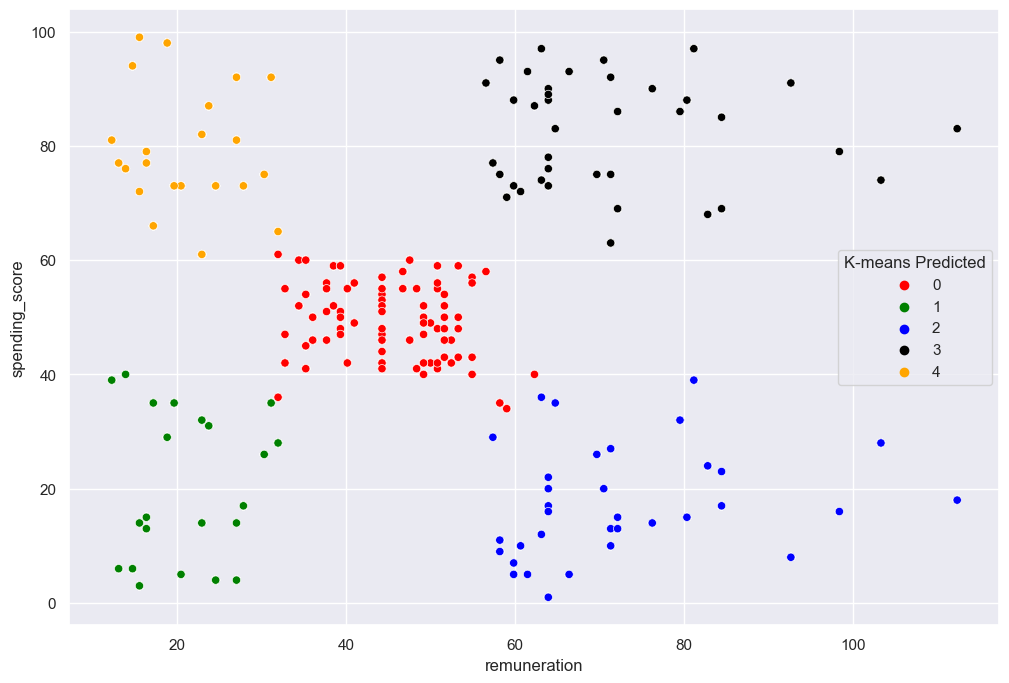

In [291]:
# Visualising the clusters (scatterplot).

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatter plot.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df3, 
                hue='K-means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# Add a title
# plt.title('Remuneration vs. Spending Score by Cluster', fontsize=14)

# plt.show()


## 7. Insights and observations


***Observations***

I decided to use 5 instead of 4 as k based on the observations of the outcomes of using different k. If we were to use 4, one of the groups with a clear trend of division would be merged with another group, which is not ideal or accurate for further analysis.

Therefore, all observations in the data set can be divided into 5 different groups. From the plot above, we see a clear division between different groups. From a business perspective of view, based on the plot above, we can give each group a specific tag to inform further actions based on their spending behaviours.

**0 (red) mid remuneration & spending (774):** This group might represent a balance between spending and income.
**1 (green) low remuneration & spending (271)** This could be a segment of customers with limited financial resources or less engagement with the product.
**2 (blue) high remunuration & low spending (330)** This might indicate customers who are less likely to spend despite having higher incomes.
**3 (black) high remuneration & spending (356)** This is a valuable segment of customers who spend significantly and have higher incomes.
**4 (yellow) low remuneration & high spending (269)** This group might be interested in the product but have financial constraints.

**Potential Actions to Improve Sales Performances:**

With this grouping result in mind, Turtle Games should use different strategies to boost sales made by different clusters of customers accordingly.

1. Offer exclusive promotions to Cluster 3 (high spending, high income)
2. Provide budget-friendly options for Cluster 1 (low spending, low income).
3. Retain valuable customers in Clusters 3 and 4 (low income, high spending) by promoting loyalty programme.
4. Personalized recommendations or proactive marketing communications to Cluster 2 (high income, low spending) so these customers will start to spend more.


# 

# NLP using Python

Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked me to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, I will apply NLP on the data set to reach the analysis goal.


## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data set as df4.
df4 = pd.read_csv('new_reviews.csv')

# View DataFrame.
print(df4.info())
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
# Explore data set.
df4.shape


(2000, 10)

In [7]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df4[['review','summary']]

# View DataFrame.
df4.head()


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [9]:
# Determine if there are any missing values.
df4.isna().sum()


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [15]:
# Review: Change all to lower case and join with a space.
df4['review_low'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df4.head()


,review,summary,review_low,summary_low
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless","nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,amazing buy! bought it as a gift for our new d...,five stars
4,As my review of GF9's previous screens these w...,Money trap,as my review of gf9's previous screens these w...,money trap


In [17]:
# Summary: Change all to lower case and join with a space.
df4['summary_low'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View output.
df4.head()

,review,summary,review_low,summary_low
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless","nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,amazing buy! bought it as a gift for our new d...,five stars
4,As my review of GF9's previous screens these w...,Money trap,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [21]:
# Replace all the punctuations in review column.
df4['review_low'] = df4['review_low'].str.replace('[^\w\s]', '', regex=True)

# View output.
df4.head()


,review,summary,review_low,summary_low
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,amazing buy bought it as a gift for our new dm...,five stars
4,As my review of GF9's previous screens these w...,Money trap,as my review of gf9s previous screens these we...,money trap


In [23]:
# Replace all the puncuations in summary column.
df4['summary_low'] = df4['summary_low'].str.replace('[^\w\s]', '', regex=True)

# View output.
df4.head()


,review,summary,review_low,summary_low
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",nice art nice printing why two panels are fill...,pretty but also pretty useless
3,Amazing buy! Bought it as a gift for our new d...,Five Stars,amazing buy bought it as a gift for our new dm...,five stars
4,As my review of GF9's previous screens these w...,Money trap,as my review of gf9s previous screens these we...,money trap


In [31]:
# View data shape
df4.shape


(2000, 4)

### 2c) Drop duplicates in both columns

In [25]:
# Check the number of duplicate values in both columns.
df4.review_low.duplicated().sum()


649

In [27]:
# Check the number of duplicate values in both columns.
df4.summary_low.duplicated().sum()


649

In [39]:
# Drop duplicates in both columns.
df4 = df4.drop_duplicates(subset = ['review_low'])
df4 = df4.drop_duplicates(subset = ['summary_low'])

# View DataFrame.
df4.reset_index(inplace=True)
df4.head()


,index,review,summary,review_low,summary_low
0,0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,Amazing buy! Bought it as a gift for our new d...,Five Stars,amazing buy bought it as a gift for our new dm...,five stars
4,4,As my review of GF9's previous screens these w...,Money trap,as my review of gf9s previous screens these we...,money trap


In [41]:
# View data shape
df4.shape


(1349, 5)

## 3. Tokenise and create wordclouds

In [45]:
# Create new DataFrame (copy DataFrame).
df4_new = df4[['review_low','summary_low']]

# View DataFrame.
df4_new.head()


,review_low,summary_low
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [77]:
# Apply tokenisation to both columns.
df4_new['review_token'] = df4_new['review_low'].apply(word_tokenize)
df4_new['summary_token'] = df4_new['summary_low'].apply(word_tokenize)

# View DataFrame.
df4_new[['review_token','summary_token']].head()


,review_token,summary_token
0,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [99]:
# Review: Create a word cloud.
review_tokens = ''

for i in range(df4_new.shape[0]):
    review_tokens = review_tokens + df4_new['review_low'][i]


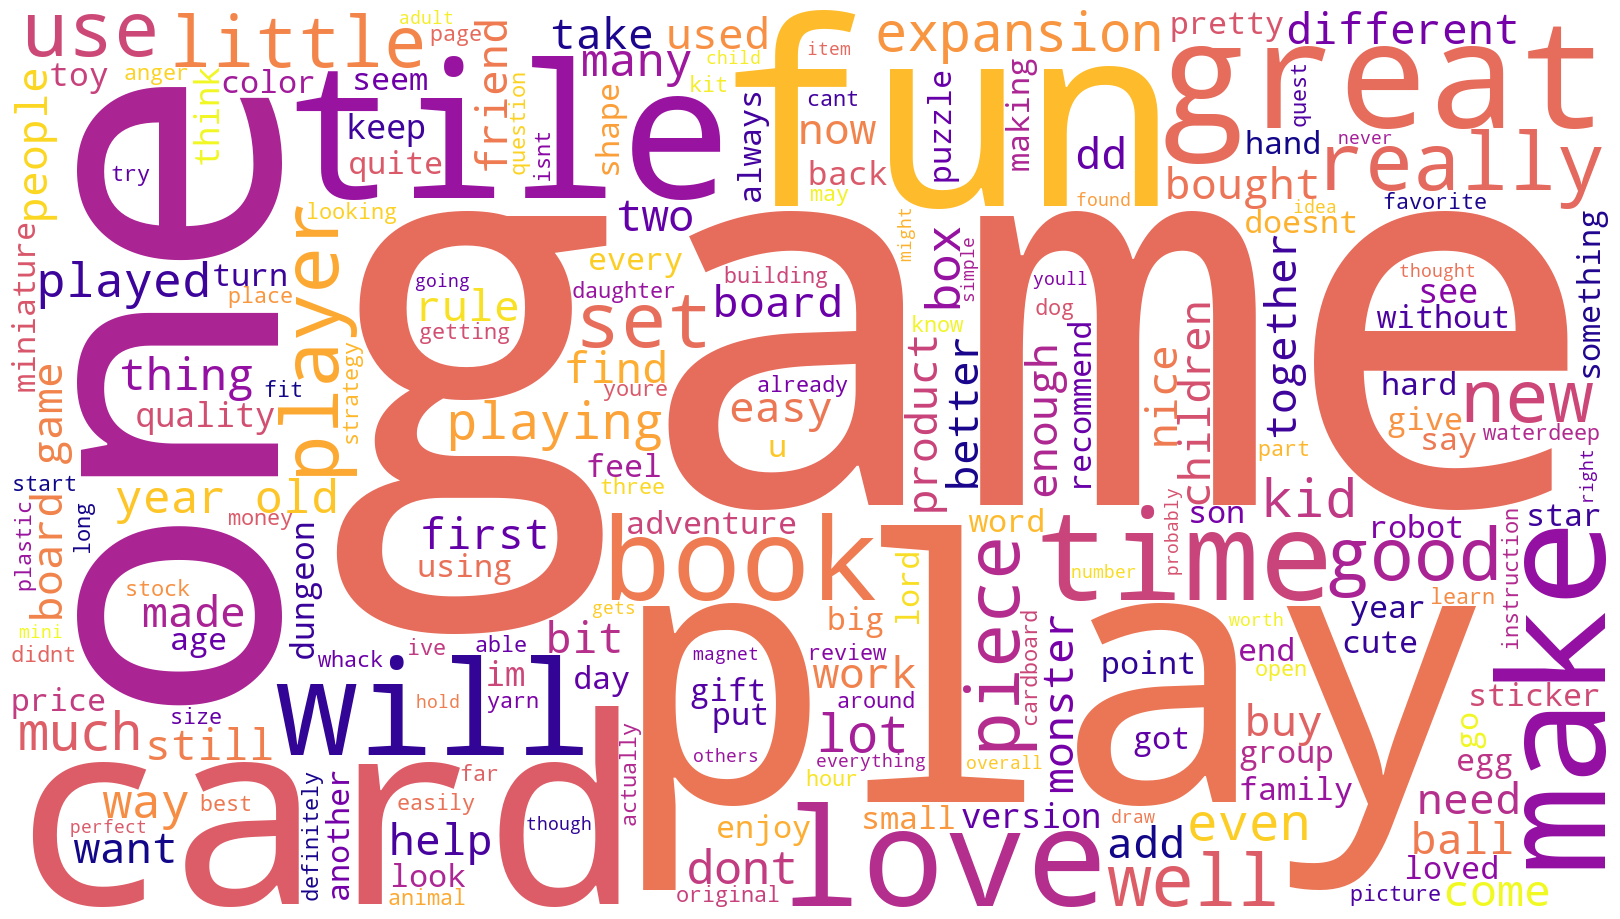

In [101]:
# Review: Plot the WordCloud image.
review_wordcloud = WordCloud(width = 1600, height = 900,
                     background_color = 'white',
                     colormap = 'plasma',
                     min_font_size=10).generate(review_tokens)

# Review: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(review_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [103]:
# Summary: Create a word cloud.
summary_tokens = ''

for i in range(df4_new.shape[0]):
    summary_tokens = summary_tokens + df4_new['summary_low'][i]


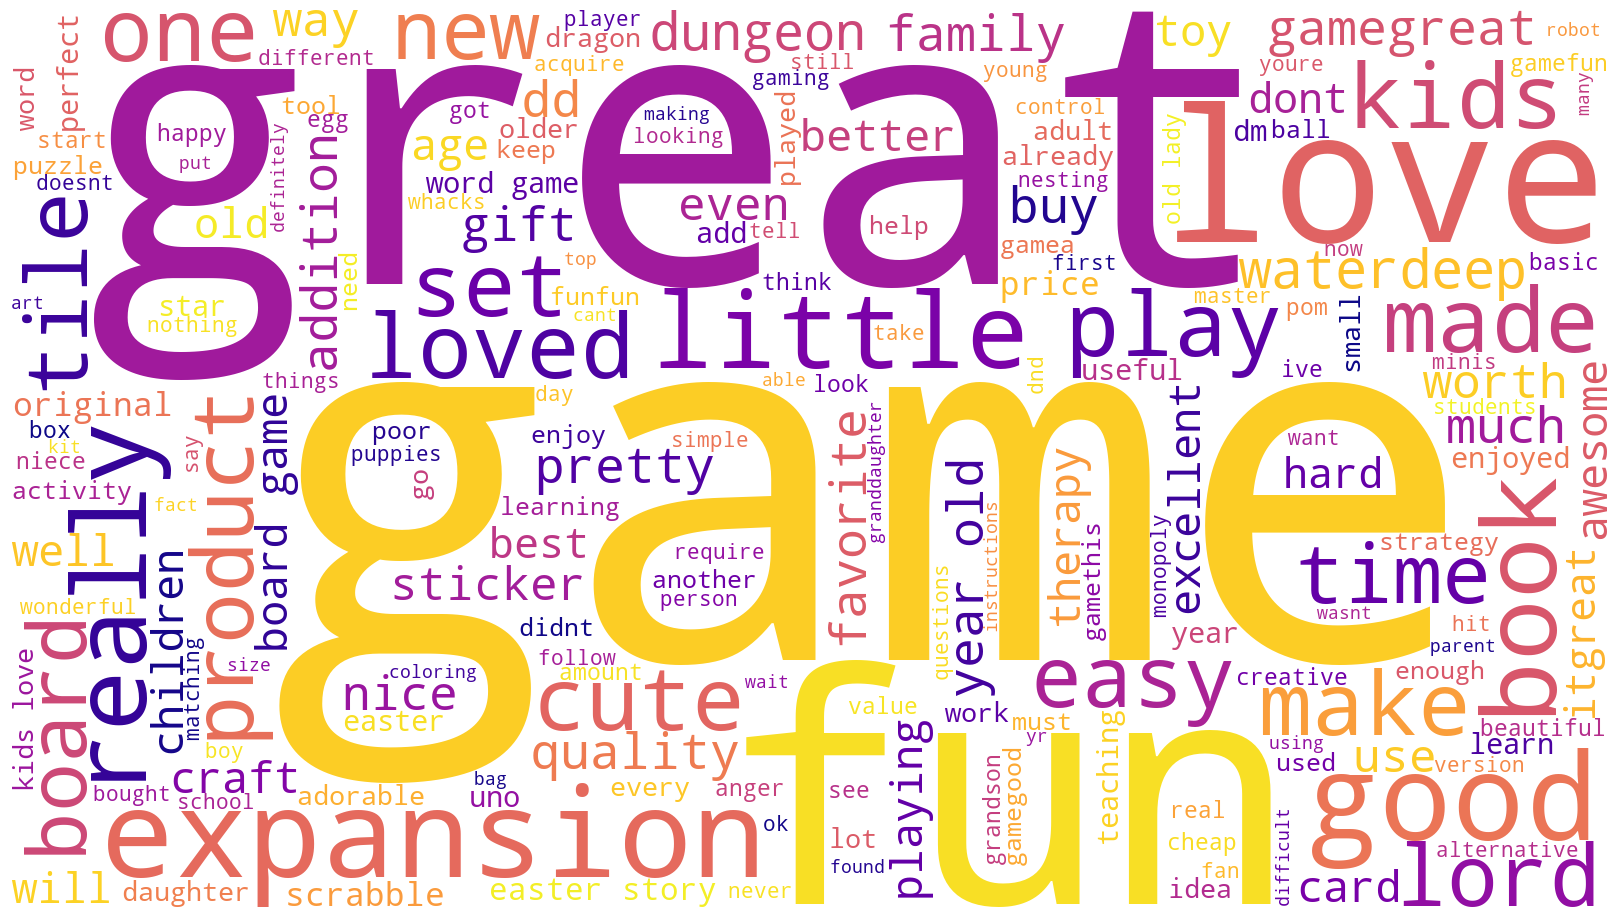

In [105]:
# Summary: Plot the WordCloud image.
summary_wordcloud = WordCloud(width = 1600, height = 900,
                     background_color = 'white',
                     colormap = 'plasma',
                     min_font_size=10).generate(summary_tokens)

# Review: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor = None)
plt.imshow(summary_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [127]:
# Determine the frequency distribution.
# Define an empty list of tokens.
all_tokens = []

for i in range(df4_new.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df4_new['review_token'][i] + df4_new['summary_token'][i]
    

In [129]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist


FreqDist({'the': 5276, 'and': 3102, 'a': 3067, 'to': 3035, 'of': 2392, 'i': 1970, 'it': 1969, 'is': 1696, 'this': 1674, 'game': 1627, ...})

### 4b) Remove alphanumeric characters and stopwords

### Delete all the alpanum.

In [131]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
clean_tokens = [word for word in all_tokens if word.isalnum()]


### Remove all the stopwords

In [139]:
# Download the stop word list.
nltk.download('stopwords')
from nltk.corpus import stopwords

# Create a set of EN stopwords.
en_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords
clean_tokens2 = [x for x in clean_tokens if x.lower() not in en_stopwords]

# Define an empty string variable.
clean_token2_string = ''

for value in clean_tokens:
    # Add each filtered token word to the string.
    clean_token2_string = clean_token2_string + value + ' '
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57452\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [141]:
# Create a wordcloud without stop words.
wordcloud_clean = WordCloud(width = 1600, height = 900,
                           background_color = 'white',
                           colormap = 'plasma',
                           min_font_size=10).generate(clean_token2_string)


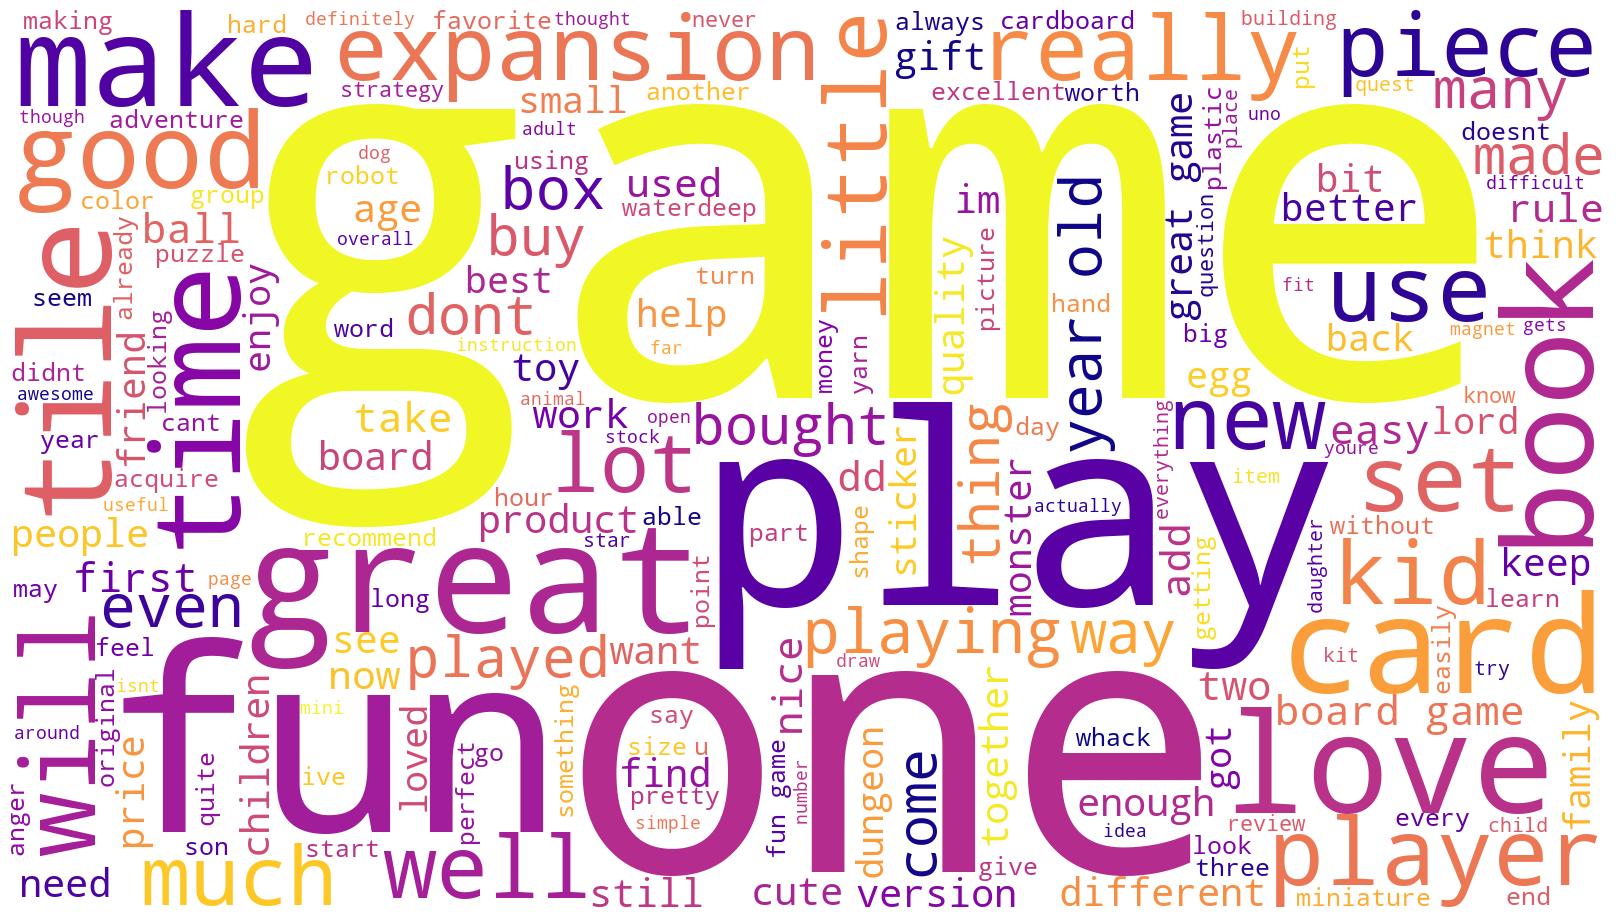

In [167]:
# Plot the wordcloud image.
plt.figure(figsize = (16,9),facecolor = None)
plt.imshow(wordcloud_clean)
plt.axis('off')
plt.tight_layout(pad = 0)

plt.show()


### 4d) Identify 15 most common words and polarity

In [145]:
# Determine the 15 most common words.
fdist_clean1 = FreqDist(clean_tokens2)

# Preview the data.
fdist_clean1


FreqDist({'game': 1627, 'great': 627, 'fun': 582, 'one': 503, 'play': 468, 'like': 427, 'good': 312, 'really': 308, 'get': 307, 'love': 305, ...})

In [147]:
# Import the Counter class.
from collections import Counter

# Genearte a DataFrame from Counter.
counts = pd.DataFrame(Counter(clean_tokens2).most_common(15),
                     columns=['Word','Frequency']).set_index('Word')

# Preview data.
counts


,Frequency
Word,
game,1627
great,627
fun,582
one,503
play,468
like,427
good,312
really,308
get,307


### Visualise the top 15 words

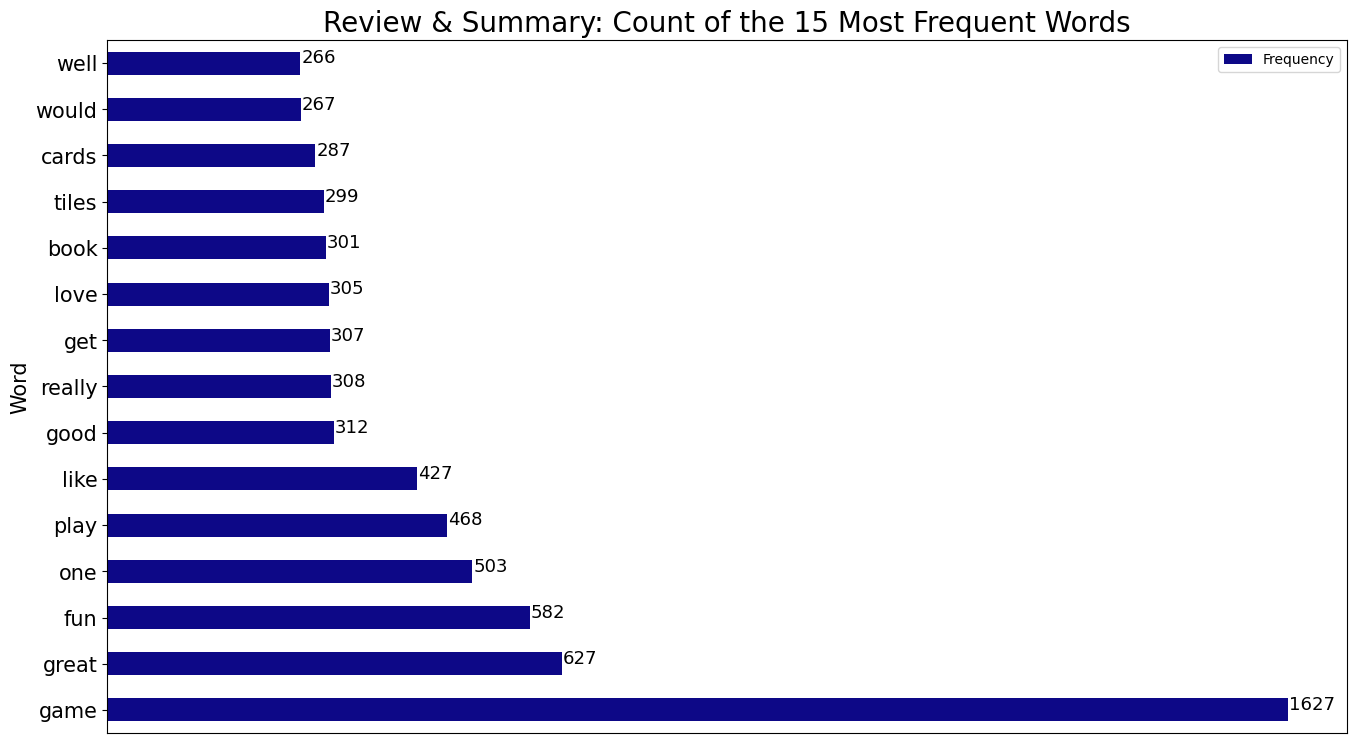

In [165]:
# Set the plot type.
ax = counts.plot(kind = 'barh', figsize = (16,9), fontsize=15, colormap = 'plasma')

# Set the labels.
ax.set_xlabel('')
ax.set_ylabel('Word', fontsize=15)
ax.set_title("Review & Summary: Count of the 15 Most Frequent Words", fontsize=20)

# Hide the x-axis completely as we wiil set bar labels directly
ax.get_xaxis().set_visible(False)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+1.25,i.get_y()+0.25,str(round((i.get_width()),2)),
            fontsize=13, color='black')
    

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [169]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]
    

In [175]:
# Determine polarity of review columns. 
df4['review_polarity'] = df4['review'].apply(generate_polarity)

# Determine polarity of summary columns. 
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# View output.
df4[['review_polarity','summary_polarity']].head()


,review_polarity,summary_polarity
0,-0.036111,0.15
1,0.035952,-0.80
2,0.116640,0.00
3,0.628788,0.00
4,-0.316667,0.00


In [177]:
# Provided function.
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]
    

In [179]:
# Determine polarity of review columns. 
df4['review_subjectivity'] = df4['review'].apply(generate_subjectivity)

# Determine polarity of summary columns. 
df4['summary_subjectivity'] = df4['summary'].apply(generate_subjectivity)

# View output.
df4[['review_subjectivity','summary_subjectivity']].head()


,review_subjectivity,summary_subjectivity
0,0.486111,0.500000
1,0.442976,0.900000
2,0.430435,0.733333
3,0.784848,0.000000
4,0.316667,0.000000


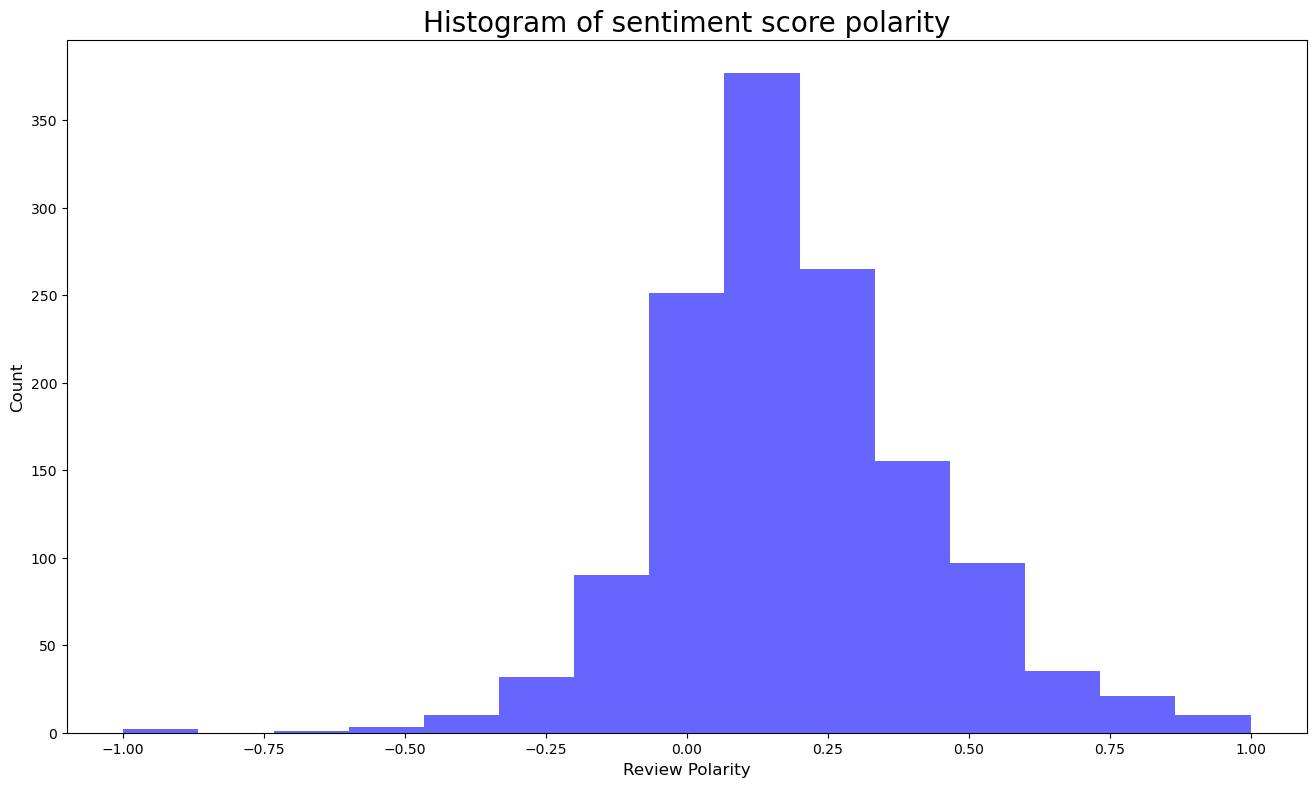

In [181]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15

# Histogram of polarity
# Set the plot area.
plt.figure(figsize=(16,9))

# Defnie the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()


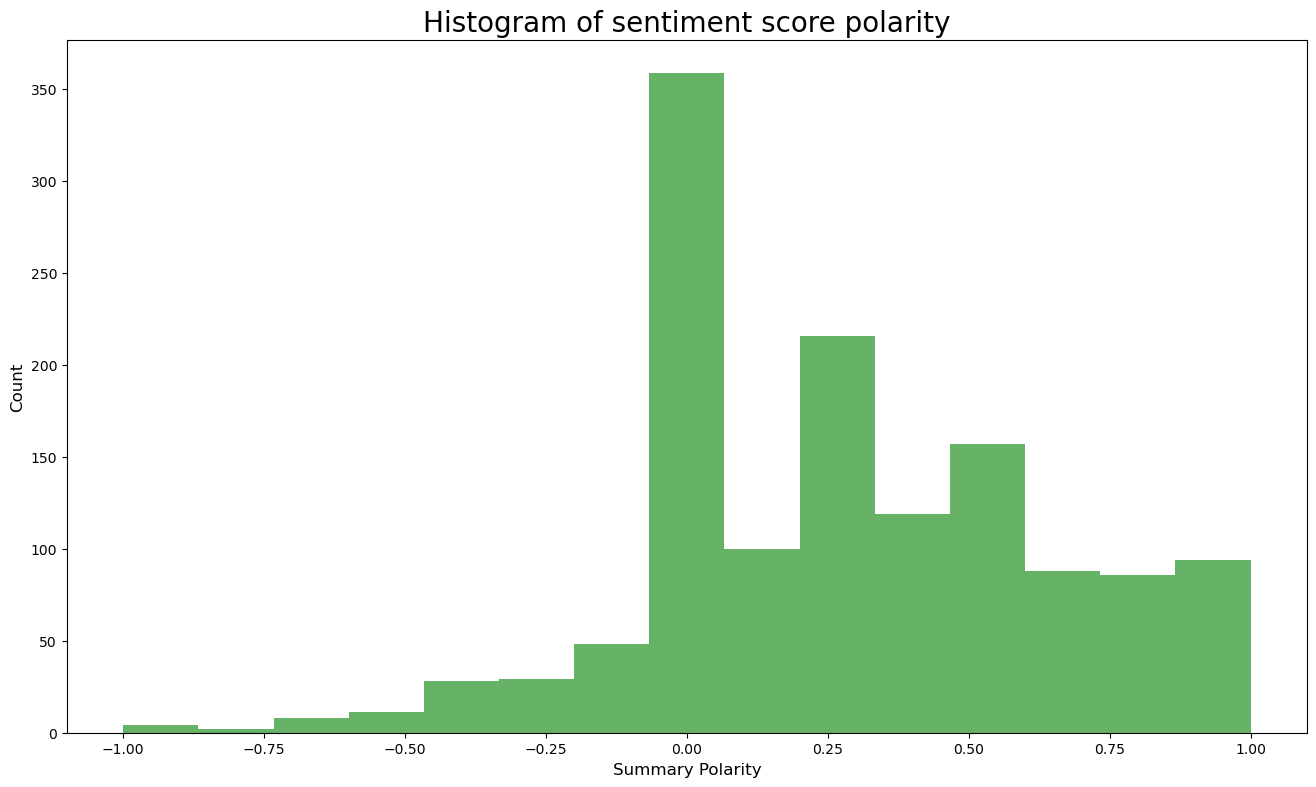

In [183]:
# Summary: Create a histogram plot with bins = 15.

# Histogram of polarity
# Set the plot area.
plt.figure(figsize=(16,9))

# Defnie the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

# Histogram of sentiment score


### Perform sentiment analysis

In [209]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\57452\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [223]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

review_sentiment = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4_new['review_token']}
summary_sentiment = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df4_new['summary_token']}


In [225]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
review_sentiment_table = pd.DataFrame(review_sentiment).T

# View the DataFrame.
review_sentiment_table


,neg,neu,pos,compound
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,0.108,0.833,0.059,-0.6333
an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,0.101,0.695,0.205,0.9404
nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,0.136,0.711,0.153,-0.0045
amazing buy bought it as a gift for our new dm and its perfect,0.000,0.490,0.510,0.8860
as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,0.203,0.797,0.000,-0.6808
...,...,...,...,...
this is a fun card game for people who like words and the artwork on the cards for each letter is absolutely beautiful try it,0.000,0.678,0.322,0.8748
fun for the family just make certain you agree on the dictionary up front it makes a big difference,0.000,0.655,0.345,0.7845
great game to keep the mind active we play it with my 87 year old motherinlaw we dont adhere strictly to the rules we sometimes help each other rearrange their letters to get higher scores everyone likes higher scores the strategy to remember is the bonus points for longest work or most words,0.000,0.721,0.279,0.9531
we are retired and find this a great way to stay alert in our spelling and vocabulary we also need to use math to keep score a great game for the brain,0.000,0.693,0.307,0.9178


In [229]:
# View compound distribution
review_sentiment_table['compound'].describe()


count    1349.000000
mean        0.660573
std         0.424773
min        -0.991300
25%         0.599400
50%         0.835300
75%         0.930500
max         0.999600
Name: compound, dtype: float64

array([[<Axes: title={'center': 'compound'}>]], dtype=object)

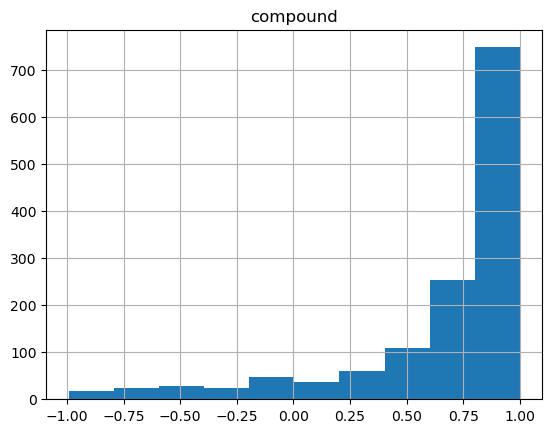

In [233]:
# Histogram of sentiment score (reviews)
review_sentiment_table['compound'].sort_values().reset_index().hist()


In [227]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
summary_sentiment_table = pd.DataFrame(summary_sentiment).T

# View the DataFrame.
summary_sentiment_table


,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
this is a fun card game for people who like words,0.000,0.580,0.420,0.7003
sort of a card game equivalent of scrabble and a lot easier,0.000,0.763,0.237,0.4215
great game to keep the mind active,0.000,0.424,0.576,0.7783
a great mind game,0.000,0.328,0.672,0.6249


In [231]:
# View compound distribution
summary_sentiment_table['compound'].describe()


count    1348.000000
mean        0.385808
std         0.347744
min        -0.905200
25%         0.000000
50%         0.510600
75%         0.624900
max         0.952400
Name: compound, dtype: float64

array([[<Axes: title={'center': 'compound'}>]], dtype=object)

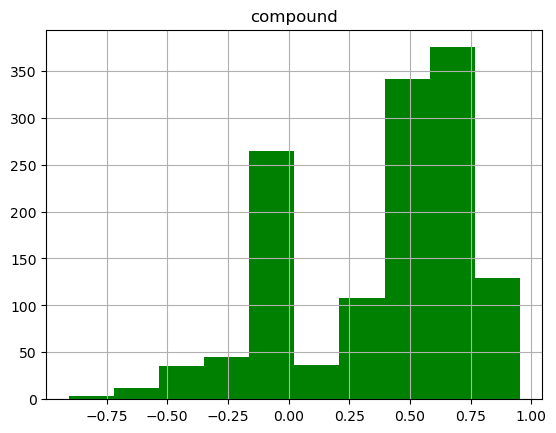

In [237]:
# Histogram of sentiment score (summary)
summary_sentiment_table['compound'].sort_values().reset_index().hist(color='green')


## 6. Identify top 20 positive and negative reviews and summaries respectively

### Negative

In [243]:
# Top 20 negative reviews.
top20_neg_review = review_sentiment_table.sort_values('neg', ascending=0).head(20)

# View output.
top20_neg_review


,neg,neu,pos,compound
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520
not as easy as it looks,0.325,0.675,0.000,-0.3412
we really did not enjoy this game,0.325,0.675,0.000,-0.4389
hard to put together,0.318,0.682,0.000,-0.1027
my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,0.318,0.613,0.069,-0.8674
easytouse great for anger management groups,0.314,0.339,0.347,0.1027
its ok but loses its luster quickly,0.309,0.524,0.168,-0.3291


In [245]:
# Top 20 negative summaries.
top20_neg_summary = summary_sentiment_table.sort_values('neg', ascending=0).head(20)

# View output.
top20_neg_summary


,neg,neu,pos,compound
disappointing,1.000,0.000,0.0,-0.4939
meh,1.000,0.000,0.0,-0.0772
boring,1.000,0.000,0.0,-0.3182
disappointed,1.000,0.000,0.0,-0.4767
frustrating,1.000,0.000,0.0,-0.4404
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


### Positive

In [247]:
# Top 20 positive reviews.
top20_pos_review = review_sentiment_table.sort_values('pos', ascending=0).head(20)

# View output.
top20_pos_review


,neg,neu,pos,compound
cute,0.0,0.000,1.000,0.4588
perfect,0.0,0.000,1.000,0.5719
fun gift,0.0,0.000,1.000,0.7351
entertaining,0.0,0.000,1.000,0.4404
fun good service,0.0,0.139,0.861,0.7351
its fun,0.0,0.233,0.767,0.5106
very cute,0.0,0.233,0.767,0.5095
liked it,0.0,0.263,0.737,0.4215
a fun game we enjoy it a great deal,0.0,0.274,0.726,0.8910
i like pie,0.0,0.286,0.714,0.3612


In [249]:
# Top 20 positive summaries.
top20_pos_summary = summary_sentiment_table.sort_values('pos', ascending=0).head(20)

# View output.
top20_pos_summary


,neg,neu,pos,compound
awesome,0.0,0.0,1.0,0.6249
great gift,0.0,0.0,1.0,0.7906
precious,0.0,0.0,1.0,0.5719
pretty cool,0.0,0.0,1.0,0.6705
wow,0.0,0.0,1.0,0.5859
ok ok,0.0,0.0,1.0,0.5267
beautiful,0.0,0.0,1.0,0.5994
perfect,0.0,0.0,1.0,0.5719
great,0.0,0.0,1.0,0.6249
ok,0.0,0.0,1.0,0.2960


## 7. Discuss: Insights and observations


### Review Column

The polarity results for sentiment analysis indicate the distribution of sentiment scores within a dataset. The count of 1349 suggests that there were 1349 instances analysed in the dataset. The mean of 0.3858 indicates that, on average, the sentiment scores lean towards the positive side, as ihigh t is a positive value.

The standard deviation (std)24773.464012 shows the degree of variability in the sentiment scores, suggesting that the sentiment opinions vary across the dataset. The minimum (min) value9913-0.890500 indicates the most negative sentiment score recorded, while the maximum (max) value996 0.980800 represents the highest positive sentiment score observed.

Regarding the quartiles, the 25th percentile (25%) has a value 599400.000000, indicating a significant prese**positive**neutral sentiments in the dataset. While the 50th percentile (50%835300.318200, suggesting that half of the sentimenveryerately positive. This median value further reinforces the trend that the overall sentiment skews positively.

Finally, the 75th percentile (75%) has a valu930500.gative, indicating a predominantly positive sentiment in the dataset.

### Summary Column

The polarity results for sentiment analysis indicate the distribution of sentiment scores within a dataset. The count of 1348 suggests that there were 1348 instances analysed in the dataset. The mean of 0.385808 indicates that, on average, the sentiment scores lean towards the positive side, as it is a positive value.

The standard deviation (std) of 0.347744 shows a certain degree of variability in the sentiment scores, suggesting that the sentiment opinions vary across the dataset. The minimum (min) value of -0.905200 indicates the most negative sentiment score recorded, while the maximum (max) value of 0.952400 represents the highest positive sentiment score observed.

Regarding the quartiles, the 25th percentile (25%) has a value of 0.000000, indicating a significant presence of neutral sentiments in the dataset. While the 50th percentile (50%) is 0.510600, suggesting that half of the sentiments are positive. This median value further reinforces the trend that the overall sentiment skews positively.

Finally, the 75th percentile (75%) has a value of 0.624900, which implies there are more positive sentiment scores than negative, indicating a predominantly positive sentiment in the dataset.

### Conclusion

The sentiment analysis results suggest that although there is some variability in opinions (as indicated by the standard deviation), the overall sentiment within the dataset is quite positive, reflecting most customers are satisfied with their purchases.

With the median sentiment score being moderately positive and a significant portion of the data exceeding this value, it can be concluded that the majority of the dataset leans towards positive sentiment. Negative sentiment is less common, as reflected by the lower quartiles, but it is still present in some instances.

This result is very encouraging to Turtle Games, as customers are happy about the products and services provided by Turtle Games. However, the business should equally acknowledge and go deeper into all negative reviews to identify points of improvement. 


# 